In [1]:
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import sklearn.tree as tr
import sklearn.model_selection as ms
import sklearn.metrics as met
import scipy.stats as stt

In [2]:
#Creating Artificial Data:
np.random.seed(25)
Min = 0
Max = 2 * mth.pi
N = 2500

In [8]:
t = np.random.uniform(Min, Max, N)
y = np.sin(t) + np.random.rand(N)/35

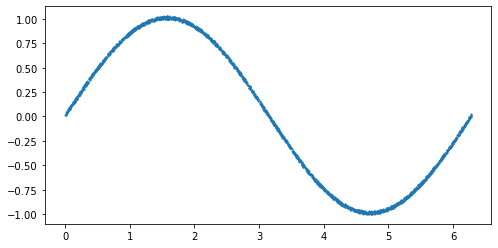

In [9]:
plt.figure(figsize = (8, 4))
plt.scatter(t, y, s = 1)

In [11]:
X = np.reshape(t, (-1, +1))
Y = np.reshape(y, (-1, +1))
Y0 = np.sin(t)

In [12]:
xtr, xte, ytr, yte = ms.train_test_split(X, Y, train_size = 0.65, random_state = 22)

In [13]:
DTR = tr.DecisionTreeRegressor(max_depth = 10, random_state = 45)
DTR .fit(xtr, ytr)

DecisionTreeRegressor(max_depth=10, random_state=45)

In [16]:
trPred = DTR.predict(xtr)
tePred = DTR.predict(xte)

#Mean squared error:
trMSE = met.mean_squared_error(ytr, trPred)
teMSE = met.mean_squared_error(yte, tePred)

#Pearson correlation coefficient:
trPCC = stt.pearsonr(ytr[:, 0] , trPred)
tePCC = stt.pearsonr(yte[:, 0] , tePred)

In [17]:
print("train MSE", trMSE)
print("test MSE", teMSE)
print("-" * 35)
print("Train PCC", trPCC)
print("Test PCC", tePCC)

train MSE 3.7416187312649124e-05
test MSE 0.00012556610215866233
-----------------------------------
Train PCC (0.9999631250661607, 0.0)
Test PCC (0.9998749456077313, 0.0)


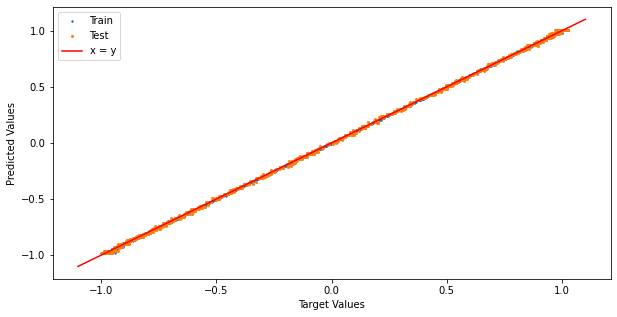

In [28]:
plt.figure(figsize = (10, 5))
plt.scatter(ytr[:, 0], trPred, label = "Train", s = 2)
plt.scatter(yte[:, 0], tePred, label = "Test", s = 4)
plt.plot([-1.1, 1.1], [-1.1, 1.1], label = "x = y", c = "r")
plt.xlabel("Target Values")
plt.ylabel("Predicted Values")
plt.legend()

In [29]:
allpred = DTR.predict(X)

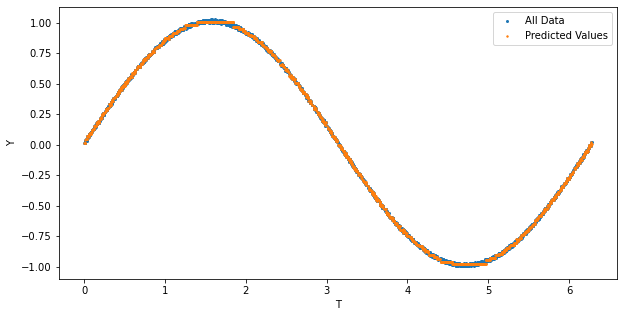

In [30]:
plt.figure(figsize = (10, 5))
plt.scatter(t, y, label = "All Data", s = 4)
plt.scatter(X[:, 0] , allpred, label = "Predicted Values", s = 2)
plt.xlabel("T")
plt.ylabel("Y")
plt.legend()

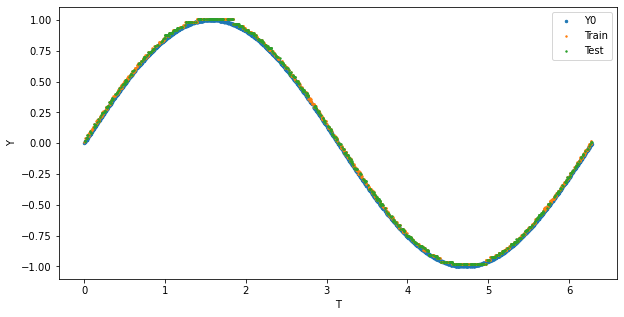

In [35]:
plt.figure(figsize = (10, 5))
plt.scatter(t, Y0, label = "Y0", s = 6)
plt.scatter(xtr[:, 0] ,trPred, label = "Train", s = 2)
plt.scatter(xte[:, 0] ,tePred, label = "Test", s = 2)
plt.xlabel("T")
plt.ylabel("Y")
plt.legend()